In [1]:
from sortedcontainers import SortedSet
import networkx as nx
import sys
import os
# dir_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(dir_path)
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle


In [2]:
data_file = 'topo' # 'HepPh'
G = clean_data(data_file)

In [3]:
print(nx.number_of_nodes(G), nx.number_of_edges(G))

34 42


Our Model

In [4]:
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)
# obtain the node degrees and edges weights to desired lengths
tmp_t = list(range(1, 5))
tmp_t_SN, tmp_t_hub = hubs_SN_NS(G, tmp_t)

combined_dict, combined_dict_k_2 = varying_examples(
    tmp_t_SN[0][1], tmp_t_hub[1][2])

# Get ranked result
opti_rank, ranked_nodes = rank_result(combined_dict, combined_dict_k_2)

print(opti_rank, ranked_nodes)



[('27', 0.9985005730418679), ('5', 0.7549436527724699), ('12', 0.75434887813017), ('28', 0.6538494099071029), ('2', 0.5865976594398602)] [('27', 0.9985005730418679), ('5', 0.7549436527724699), ('12', 0.75434887813017), ('28', 0.6538494099071029), ('2', 0.5865976594398602), ('8', -0.050453003066369795), ('29', -0.08741203815217125), ('11', -0.09476383267522936), ('33', -0.1785220459582076), ('16', -0.17915011452858887), ('22', -0.21433411540053987), ('14', -0.26103242352740835), ('24', -0.2741646003757832), ('26', -0.3314800344449304), ('7', -0.34776492282853405), ('21', -0.4675182149424362), ('6', -0.5222256043810737), ('23', -0.6131195019583244), ('13', -0.657028903456349), ('32', -0.7094072525888995), ('3', -0.7305873447843267), ('34', -0.7897546865705557), ('15', -0.7933125112241983), ('31', -0.7953706107202866), ('25', -0.797530665360725), ('17', -0.79836359602605), ('19', -0.8073718135156045), ('10', -0.8165377332519864), ('9', -0.8454161947787605), ('4', -0.8715703385708794), ('2

In [18]:
max_ = len(opti_rank)/nx.number_of_nodes(G)  # 0.16
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)

degreerank = degree(G, max_topk)
print('degreerank: ', degreerank)
degreerank_non = degree_non(G, max_topk)
print('degreerank_non :', degreerank_non)

node_strength_rank_1 = sorted([(i, sum(hub_information(G, i, 1))) for (i, j) in list(G.degree())],
                              key=lambda item: item[1], reverse=True)[:max_topk]
print("node_strength_rank_1: ",node_strength_rank_1)

node_strength_rank_2 = sorted([(i, sum(hub_information(G, i, 2))) for (i, j) in list(G.degree())],
                              key=lambda item: item[1], reverse=True)[:max_topk]
print("node_strength_rank_2: ", node_strength_rank_2)

node_step_nbr_1 = sorted([(i, len(n_neighbor(G, i, 1))) for (i, j) in list(G.degree())],
                         key=lambda item: item[1], reverse=True)[:max_topk]
print("node_step_nbr_1: ",node_step_nbr_1)

node_step_nbr_2 = sorted([(i, len(n_neighbor(G, i, 2))) for (i, j) in list(G.degree())],
                         key=lambda item: item[1], reverse=True)[:max_topk]
print("node_step_nbr_2: ",node_step_nbr_2)


newmethod_rank = EnRenewRank(G, max_topk, 2)
print('newmethod_rank: ', newmethod_rank)

kshell_rank = kshell(G, max_topk)
print('kshell_rank: ', kshell_rank)
kshell_rank_non = kshell_non(G, max_topk)
print('kshell_rank_non: ', kshell_rank_non)


5
degreerank:  [('2', ' '), ('5', ' '), ('12', ' '), ('6', ' '), ('7', ' ')]
degreerank_non : [('2', ' '), ('12', ' '), ('6', ' '), ('8', ' '), ('16', ' ')]
node_strength_rank_1:  [('27', 88.175), ('28', 40.637), ('12', 34.97800000000001), ('26', 30.902), ('33', 30.81)]
node_strength_rank_2:  [('27', 220.161), ('28', 166.328), ('33', 130.799), ('22', 127.098), ('26', 114.425)]
node_step_nbr_1:  [('2', 4), ('5', 4), ('12', 4), ('6', 3), ('7', 3)]
node_step_nbr_2:  [('5', 10), ('8', 9), ('12', 9), ('29', 9), ('2', 8)]
newmethod_rank:  [('5', 0.9097548562597484), ('12', 0.7276923667828582), ('29', 0.6539714380359193), ('14', 0.6058815878364635), ('24', 0.5577917376370076)]
kshell_rank:  [('2', ' '), ('5', ' '), ('12', ' '), ('6', ' '), ('7', ' ')]
kshell_rank_non:  [('2', ' '), ('12', ' '), ('6', ' '), ('8', ' '), ('16', ' ')]


## Different Lambda $(\lambda)$

In [20]:
infect_prob = compute_probability(G) * 1.5
avg = 100
max_iter = 200000
topk = round(max_ * nx.number_of_nodes(G))

degreerank_result = []
degreerank_non_result = []
vote_result = []
vote_non_result = []
newmethod_result = []
newmethod_non_result = []
kshell_result = []
kshell_non_result = []
evbrM_result = []
node_strength_rank_1_result = []
node_strength_rank_2_result = []
node_step_nbr_1_result = []
node_step_nbr_2_result = []
# atio = [a/10 for a in list(range(10, 21, 2))]

for a in tqdm(range(10, 21, 2)):
    atio = a / 10
    cover_prob = infect_prob / atio
    degreerank_result.append(get_sir_result(G, degreerank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # degreerank_non_result.append(get_sir_result(G, degreerank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_result.append(get_sir_result(G, vote, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    # vote_non_result.append(get_sir_result(G, vote_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    newmethod_result.append(get_sir_result(G, newmethod_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_result.append(get_sir_result(G, kshell_rank, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    kshell_non_result.append(get_sir_result(G, kshell_rank_non, topk, avg, infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    evbrM_result.append(get_sir_result(G, opti_rank, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_strength_rank_1_result.append(get_sir_result(G, node_strength_rank_1, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_strength_rank_2_result.append(get_sir_result(G, node_strength_rank_2, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_step_nbr_1_result.append(get_sir_result(G, node_step_nbr_1, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))
    node_step_nbr_2_result.append(get_sir_result(G, node_step_nbr_2, topk, avg,infect_prob, cover_prob, max_iter)[-1] / nx.number_of_nodes(G))


100%|██████████| 6/6 [00:01<00:00,  3.13it/s]


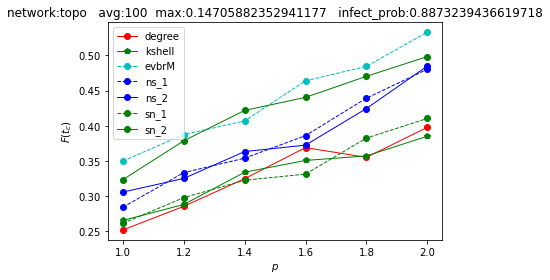

In [30]:
%matplotlib inline
plt.title('network:{}   avg:{}  max:{}   infect_prob:{}'.format(data_file, avg, max_, infect_prob))
plt.plot(np.array(range(10, 21, 2)) / 10, degreerank_result, 'r-o', label='degree', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, degreerank_non_result, 'r--o', label='degree_non', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, vote_result, 'y-s', label='vote', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, vote_non_result, 'y--s', label='vote_non', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, newmethod_result, 'b-^', label='EnRenew', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, kshell_result, 'g-p', label='kshell', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, kshell_non_result, 'g--p', label='kshell_non', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, evbrM_result, 'c--o', label='evbrM', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_strength_rank_1_result, 'b--o', label='ns_1', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_strength_rank_2_result, 'b-o', label='ns_2', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_step_nbr_1_result, 'g--o', label='sn_1', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 2)) / 10, node_step_nbr_2_result, 'g-o', label='sn_2', linewidth=1.0, )
plt.legend(loc="upper left")
plt.ylabel("$F(t_c)$")
plt.xlabel('$p$')
plt.show()


In [12]:
print(opti_rank)
node_list = [i for i,j in list(G.degree())]
opti_rank_nodes = [i for i, j in opti_rank]
opti_rank_set = sorted(set(opti_rank_nodes), key=opti_rank_nodes.index)
print(opti_rank_set)
chosen_1 = [(i, n_neighbor(G, i, 1)) for (i, j) in opti_rank]
chosen_2 = [(i, n_neighbor(G, i, 2)) for (i, j) in opti_rank]
print(chosen_1,"...",chosen_2)
remainder_nodes = list(set(node_list) - set(opti_rank_nodes))


[('27', 0.9985005730418679), ('5', 0.7549436527724699), ('12', 0.75434887813017), ('28', 0.6538494099071029), ('2', 0.5865976594398602)]
['27', '5', '12', '28', '2']
[('27', ['28', '26', '33']), ('5', ['2', '6', '7', '8']), ('12', ['11', '13', '22', '32']), ('28', ['17', '27', '29']), ('2', ['1', '3', '4', '5'])] ... [('27', ['17', '29', '25', '28', '26', '34', '33']), ('5', ['10', '1', '14', '2', '3', '4', '6', '7', '8', '9']), ('12', ['13', '10', '11', '14', '20', '21', '22', '32', '9']), ('28', ['18', '19', '17', '27', '21', '29', '26', '33']), ('2', ['1', '15', '3', '4', '5', '6', '7', '8'])]


['1',
 '26',
 '8',
 '14',
 '19',
 '25',
 '18',
 '34',
 '24',
 '30',
 '23',
 '11',
 '15',
 '4',
 '20',
 '22',
 '17',
 '10',
 '31',
 '6',
 '7',
 '16',
 '3',
 '21',
 '9',
 '32',
 '29',
 '33',
 '13']

[('27', ['17', '25', '28', '26', '29', '33', '34']),
 ('5', ['14', '10', '1', '2', '3', '4', '6', '7', '8', '9']),
 ('12', ['13', '14', '10', '11', '20', '21', '22', '32', '9']),
 ('28', ['17', '19', '18', '29', '26', '27', '21', '33']),
 ('2', ['15', '1', '3', '4', '5', '6', '7', '8'])]

In [50]:
sorted(['26', '28', '33'], key=lambda x: int(x[0])

['26', '28', '33']